In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the two CSV files
normal_data_path = 'data_normal.csv'  # Replace with your file path
stress_data_path = 'data_stress.csv'  # Replace with your file path

# Reading the CSV files
data_normal = pd.read_csv(normal_data_path)
data_stress = pd.read_csv(stress_data_path)

In [3]:
# Extracting data for 'sub_1' from both datasets
ppg_normal = data_normal[data_normal['subject ID'] == 'sub_1'].iloc[:, 2:].dropna(axis=1).values.flatten()
ppg_stress = data_stress[data_stress['subject ID'] == 'sub_1'].iloc[:, 2:].dropna(axis=1).values.flatten()

In [4]:
# Creating a time axis for both signals (assuming each column represents an equal time step)
time_normal = range(len(ppg_normal))
time_stress = range(len(ppg_stress))

In [5]:
# Function to detect abnormalities (e.g., sudden spikes or drops)
def detect_abnormalities(signal, threshold=50):
    """Detects abnormalities where the signal changes abruptly by a certain threshold."""
    abnormalities = []
    for i in range(1, len(signal)):
        if abs(signal[i] - signal[i - 1]) > threshold:
            abnormalities.append(i)
    return abnormalities

In [6]:
# Detecting abnormalities in both signals
abnormalities_normal = detect_abnormalities(ppg_normal)
abnormalities_stress = detect_abnormalities(ppg_stress)

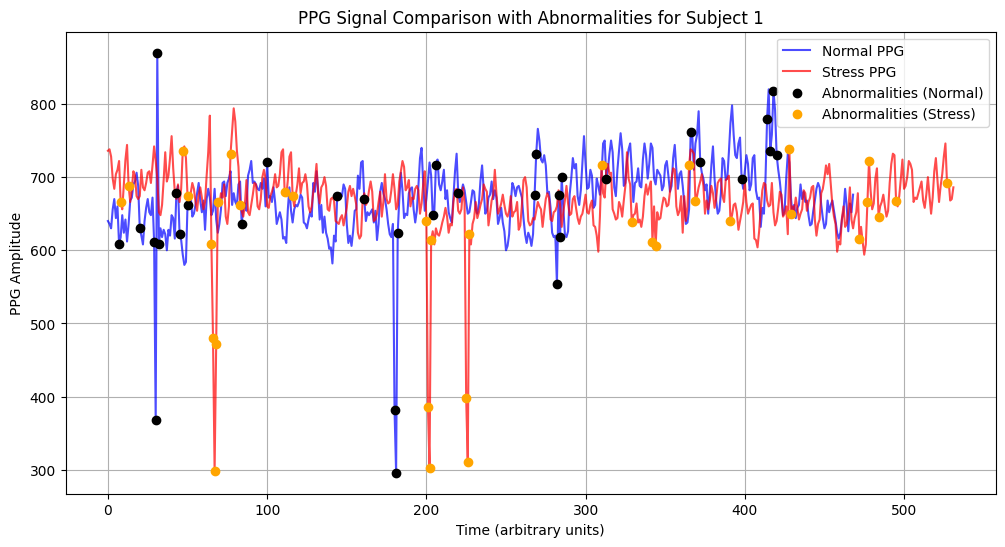

In [7]:
# Plotting the signals
plt.figure(figsize=(12, 6))
plt.plot(time_normal, ppg_normal, label='Normal PPG', color='blue', alpha=0.7)
plt.plot(time_stress, ppg_stress, label='Stress PPG', color='red', alpha=0.7)

# Marking abnormalities
plt.scatter([time_normal[i] for i in abnormalities_normal],
            [ppg_normal[i] for i in abnormalities_normal],
            color='black', label='Abnormalities (Normal)', zorder=5)

plt.scatter([time_stress[i] for i in abnormalities_stress],
            [ppg_stress[i] for i in abnormalities_stress],
            color='orange', label='Abnormalities (Stress)', zorder=5)

# Adding titles and labels
plt.title('PPG Signal Comparison with Abnormalities for Subject 1')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('PPG Amplitude')
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()